In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
import scipy.optimize as op

hfont = {'fontname':'Times New roman'}
mg2color = [107/256.0, 70/256.0, 177/256.0]



binning by SN   --- human_acceptance_false_results_final.fits

for all equivalent widths inserted   ---

    minSN    maxSN  inserted_number discovered_number  RATIO_discovered/inserted
    
      0.00000      1.00000        1041     24.0000     0.0230548
      1.00000      2.00000         160      8.00000    0.0500000      
      2.00000      3.00000          61      5.00000    0.0819672
      3.00000      4.00000          43      5.00000     0.116279
      4.00000      5.00000          25      2.00000    0.0800000
      5.00000      6.00000          18      1.00000    0.0555556
      6.00000      8.00000          24      1.00000    0.0416666
      8.00000      10.0000          35      1.00000    0.0285714




  

In [2]:
# pass the values to arrays
min_sn = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0])
max_sn = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0])
value = np.array([0.0230548, 0.0500000, 0.0819672,  0.116279, 0.0800000, 0.0555556, 0.0416666, 0.0285714])

mid_sn = 0.5*(max_sn - min_sn) + min_sn

print(mid_sn)

[ 0.5  1.5  2.5  3.5  4.5  5.5  7.   9. ]


In [3]:
n = np.array([1041, 160, 61,  43,  25,  18,  24, 35.0])
ns = np.array([24.0, 4.0, 2.0, 5.0, 2.0, 1.0, 1.0, 1.0])

nf = n - ns
z = 1.96

error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error == 0)] = 0.0278
#error[0]=0.023565
#error[7]= 0.12
print(error)
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0


[ 0.09490668  0.0387069   0.0272604   0.04120014  0.02658673  0.01904778
  0.01918732  0.01931797]


/Users/acodoreanu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/acodoreanu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/acodoreanu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/acodoreanu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/acodoreanu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


36352.9566846
-0.002 0.003 0.008
0.029 0.032 0.035


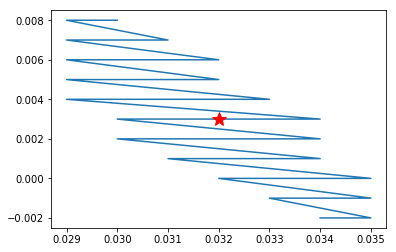

In [4]:
# leave a cell for the fitting process
# m = scalar (0 to 0.15 in 0.001 steps)
# sn = is the signal to noise (the x axis)
# s = is an exponential scale factor (also to be fit for, (0 to 5, in 0.01 steps), from looking at the distribution)
chi2 = np.zeros(300.0*400.0)
inv_sigma2 =  np.zeros(300.0*400.0)
lnlike =  np.zeros(300.0*400.0)
ms = np.zeros(300.0*400.0)
bs = np.zeros(300.0*400.0)

y = np.array([0.0, 0.0230548, 0.0500000, 0.0819672])
x = np.array([0.0, 0.5, 1.5, 2.5])

local_counter = 0
for b in range(0, 400):
    local_b = b/1000.0 - 0.02
    for m in range(0, 300): 
        local_m = m/1000.0

        model = local_b + local_m*x
        chi2[local_counter] = np.sum((model - y)*(model - y))#/yerr/yerr)
        ms[local_counter] = local_m
        bs[local_counter] = local_b
        local_counter = local_counter + 1
       

chi2scale = 1./min(chi2)
chi2_adjusted = chi2*chi2scale
best_ms = ms[np.where((chi2_adjusted < 2.706))]
best_bs = bs[np.where((chi2_adjusted < 2.706))]
mms = ms[np.where((chi2_adjusted == min(chi2_adjusted)))]
bbs = bs[np.where((chi2_adjusted == min(chi2_adjusted)))]


print(chi2scale)
print(min(best_bs), bbs[0], max(best_bs))
print(min(best_ms), mms[0], max(best_ms))

#plt.plot(ms, bs)
plt.plot(best_ms, best_bs)
plt.plot(mms, bbs, 'r*',markersize=15 )

/Users/acodoreanu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/acodoreanu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/acodoreanu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/acodoreanu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/acodoreanu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1528.05107721
0.105 0.153 0.2
-0.022 -0.015 -0.008


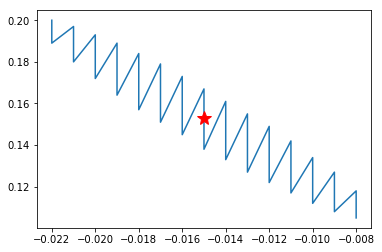

In [5]:
# leave a cell for the fitting process
# triangular function where
# fit_function = mx + b
# in 2 steps
# m = scalar (0 to 0.15 in 0.001 steps)
# sn = is the signal to noise (the x axis)
# s = is an exponential scale factor (also to be fit for, (0 to 5, in 0.01 steps), from looking at the distribution)
chi2 = np.zeros(300.0*400.0)
inv_sigma2 =  np.zeros(300.0*400.0)
lnlike =  np.zeros(300.0*400.0)
ms = np.zeros(300.0*400.0)
bs = np.zeros(300.0*400.0)
x = np.array([ 3.5, 4.5, 5.5, 7.0, 9.0])
y = np.array([ 0.116279, 0.0800000, 0.0555556, 0.0416666, 0.0285714])

local_counter = 0
for m in range(0, 300): 
    local_m = m/-1000.0
    for b in range(0, 400):
        local_b = b/1000.0 - 0.002

        model = local_m*x + local_b
        chi2[local_counter] = np.sum((model - y)*(model - y))#/yerr/yerr)
        ms[local_counter]   = local_m
        bs[local_counter]   = local_b
        local_counter = local_counter + 1
    
chi2scale = 1./min(chi2)
chi2_adjusted = chi2*chi2scale
best_ms = ms[np.where((chi2_adjusted < 2.706))]
best_bs = bs[np.where((chi2_adjusted < 2.706))]
mms = ms[np.where((chi2_adjusted == min(chi2_adjusted)))]
bbs = bs[np.where((chi2_adjusted == min(chi2_adjusted)))]


print(chi2scale)
print(min(best_bs), bbs[0], max(best_bs))
print(min(best_ms), mms[0], max(best_ms))

#plt.plot(ms, bs)
plt.plot(best_ms, best_bs)
plt.plot(mms, bbs, 'r*',markersize=15 )

In [8]:
# get where the two fits cross over
# above : best_fit = -0.02*x + 0.177
# below : best_fit = -0.015*x + 0.153
# 0.032*x + 0.003 = -0.015*x + 0.153
# x*(0.032 + 0.015) = 0.153 - 0.003
common_x = (0.153 - 0.003)/(0.032 + 0.015)
print(common_x)

3.1914893617021276


[ 0.003       0.019       0.051       0.083       0.10512766]
[ 0.03478723  0.006      -0.016      -0.049      -0.093      -0.1194    ]
[ 0.5  1.5  2.5  3.5  4.5  5.5  7.   9. ] [ 0.0230548  0.05       0.0819672  0.116279   0.08       0.0555556
  0.0416666  0.0285714]


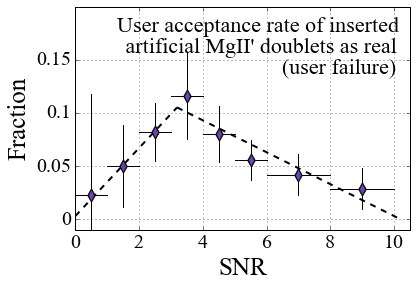

In [11]:
# plot the data
# x, y labels and title
plt.ylabel('Fraction', **hfont,  fontsize=25)
plt.xlabel('SNR', **hfont,  fontsize=25)
#plt.title(' MgII ', **hfont,  fontsize=25)

# x and y ranges and scale
plt.xlim([-0.01, 10.5])
plt.ylim([-0.01, 0.2])

# x and y ticks
xlabels = ['0', '2', '4', '6', '8', '10']
plt.xticks([0, 2, 4, 6, 8, 10], 
            xlabels, **hfont, fontsize = 20)
ylabels = ['0', '0.05', '0.1', '0.15']
plt.yticks([0, 0.05, 0.1, 0.15], 
            ylabels, **hfont, fontsize = 20)

plt.grid(True)


# my fits below sn 4
# -0.002 0.003 0.008
#  0.029 0.032 0.035
x = np.array([0, 0.5, 1.5, 2.5, 3.1914893617021276])
fit_below = 0.029*x - 0.002
fit_above = 0.035*x + 0.008
best_fit = 0.032*x + 0.003
#plt.fill_between(x, fit_below, fit_above, color = 'r', alpha = 0.2)
plt.plot(x, best_fit, 'k--', lw = 2, alpha = 1)
print(best_fit)

# my fits above sn 4
#0.105 0.153 0.2
#-0.022 -0.015 -0.008
x = np.array([3.1914893617021276, 4.5, 5.5, 7.0, 9.0, 10.2])
fit_below = -0.022*x + 0.105
fit_above = -0.008*x + 0.2
best_fit = -0.015*x + 0.153
#plt.fill_between(x, fit_below, fit_above, color = 'r', alpha = 0.2)
plt.plot(x, best_fit, 'k--', lw = 2, alpha = 1)
print(fit_below)


# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the horizontal bounds    
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'kd', markersize=10, alpha=1.0)  
plt.plot(mid_sn, value, 'd', markersize=8, color = mg2color, alpha=1.0)   

print(mid_sn, value)
# output a label
txt = plt.text(1.3, 0.177, "User acceptance rate of inserted", **hfont,  fontsize=22)
txt = plt.text(1.4, 0.157, " artificial MgII' doublets as real", **hfont,  fontsize=22)
txt = plt.text(6.5, 0.138, "(user failure)", **hfont,  fontsize=22)


plt.savefig('mg2_acceptance_artificial_as_real.png', bbox_inches='tight', figsize=[24,12], dpi=500)